# Data preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
rawdat = pd.read_csv("/srv/scratch/z3289452/OceanDataScience/Ship_data/NRSPHB_1953_2010.csv")

In [4]:
rawdat.columns

Index(['SURVEY_NAME', 'STATION_NO', 'START_TIME', 'END_TIME', 'MIN_DEPTH',
       'MAX_DEPTH', 'BOTTTOM_DEPTH', 'BOTTOM_TIME', 'BOTTOM_LAT', 'BOTTOM_LON',
       'END_LAT', 'END_LON', 'START_LAT', 'START_LON', 'PROJECT_NAME',
       'MARLIN_ID', 'BOTTLE_NUMBER', 'PRESSURE', 'ROSETTE_POSITION',
       'ROSETTE_POSITION_QC_FLAG', 'NITRATE_VALUE', 'NITRATE_QC_FLAG',
       'NITRITE_VALUE', 'NITRITE_QC_FLAG', 'OXYGEN_VALUE', 'OXYGEN_QC_FLAG',
       'PHOSPHATE_VALUE', 'PHOSPHATE_QC_FLAG', 'SALINITY_VALUE',
       'SALINITY_QC_FLAG', 'SILICATE_VALUE', 'SILICATE_QC_FLAG',
       'TEMPERATURE_VALUE', 'TEMPERATURE_QC_FLAG', 'AMMONIA_VALUE',
       'AMMONIA_QC_FLAG'],
      dtype='object')

In [5]:
# rawdat = rawdat.loc[:,~rawdat.columns.isin(['START_TIME'])]
# rawdat.drop(columns=rawdat.columns[[0,1,3,]])
rawdat = rawdat[['START_TIME', 'PRESSURE', 'TEMPERATURE_VALUE', 'TEMPERATURE_QC_FLAG', 'SALINITY_VALUE', 'SALINITY_QC_FLAG', 'NITRATE_VALUE', 'NITRATE_QC_FLAG', 
                 'NITRITE_VALUE', 'NITRITE_QC_FLAG', 'OXYGEN_VALUE', 'OXYGEN_QC_FLAG', 'PHOSPHATE_VALUE', 'PHOSPHATE_QC_FLAG', 'SILICATE_VALUE', 'SILICATE_QC_FLAG', 
                 'AMMONIA_VALUE', 'AMMONIA_QC_FLAG']]
rawdat.head()

,START_TIME,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG,NITRITE_VALUE,NITRITE_QC_FLAG,OXYGEN_VALUE,OXYGEN_QC_FLAG,PHOSPHATE_VALUE,PHOSPHATE_QC_FLAG,SILICATE_VALUE,SILICATE_QC_FLAG,AMMONIA_VALUE,AMMONIA_QC_FLAG
0,31/05/1953 0:00,0.0,18.6,0.0,35.444,0.0,< 0.02,63.0,NaN,NaN,240.79,0.0,0.26,0.0,NaN,NaN,NaN,NaN
1,31/05/1953 0:00,10.0,18.6,0.0,35.371,0.0,0.1,0.0,NaN,NaN,242.13,0.0,0.26,0.0,NaN,NaN,NaN,NaN
2,31/05/1953 0:00,20.0,18.7,0.0,35.462,0.0,< 0.02,63.0,NaN,NaN,248.38,0.0,0.29,0.0,NaN,NaN,NaN,NaN
3,31/05/1953 0:00,30.0,18.8,0.0,35.462,0.0,1.2,0.0,NaN,NaN,238.55,0.0,0.26,0.0,NaN,NaN,NaN,NaN
4,31/05/1953 0:00,40.0,18.8,0.0,35.444,0.0,< 0.02,63.0,NaN,NaN,232.30,0.0,0.29,0.0,NaN,NaN,NaN,NaN


In [6]:
rawdat.NITRATE_VALUE = rawdat.NITRATE_VALUE.where(rawdat.NITRATE_VALUE != '< 0.02', '0')
rawdat.NITRATE_VALUE = pd.to_numeric(rawdat.NITRATE_VALUE)
rawdat.head()

,START_TIME,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG,NITRITE_VALUE,NITRITE_QC_FLAG,OXYGEN_VALUE,OXYGEN_QC_FLAG,PHOSPHATE_VALUE,PHOSPHATE_QC_FLAG,SILICATE_VALUE,SILICATE_QC_FLAG,AMMONIA_VALUE,AMMONIA_QC_FLAG
0,31/05/1953 0:00,0.0,18.6,0.0,35.444,0.0,0.0,63.0,NaN,NaN,240.79,0.0,0.26,0.0,NaN,NaN,NaN,NaN
1,31/05/1953 0:00,10.0,18.6,0.0,35.371,0.0,0.1,0.0,NaN,NaN,242.13,0.0,0.26,0.0,NaN,NaN,NaN,NaN
2,31/05/1953 0:00,20.0,18.7,0.0,35.462,0.0,0.0,63.0,NaN,NaN,248.38,0.0,0.29,0.0,NaN,NaN,NaN,NaN
3,31/05/1953 0:00,30.0,18.8,0.0,35.462,0.0,1.2,0.0,NaN,NaN,238.55,0.0,0.26,0.0,NaN,NaN,NaN,NaN
4,31/05/1953 0:00,40.0,18.8,0.0,35.444,0.0,0.0,63.0,NaN,NaN,232.30,0.0,0.29,0.0,NaN,NaN,NaN,NaN


In [7]:
rawdat.START_TIME = pd.to_datetime(rawdat.START_TIME, infer_datetime_format=True, dayfirst=True)
start_time = rawdat.START_TIME
rawdat.head()

,START_TIME,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG,NITRITE_VALUE,NITRITE_QC_FLAG,OXYGEN_VALUE,OXYGEN_QC_FLAG,PHOSPHATE_VALUE,PHOSPHATE_QC_FLAG,SILICATE_VALUE,SILICATE_QC_FLAG,AMMONIA_VALUE,AMMONIA_QC_FLAG
0,1953-05-31,0.0,18.6,0.0,35.444,0.0,0.0,63.0,NaN,NaN,240.79,0.0,0.26,0.0,NaN,NaN,NaN,NaN
1,1953-05-31,10.0,18.6,0.0,35.371,0.0,0.1,0.0,NaN,NaN,242.13,0.0,0.26,0.0,NaN,NaN,NaN,NaN
2,1953-05-31,20.0,18.7,0.0,35.462,0.0,0.0,63.0,NaN,NaN,248.38,0.0,0.29,0.0,NaN,NaN,NaN,NaN
3,1953-05-31,30.0,18.8,0.0,35.462,0.0,1.2,0.0,NaN,NaN,238.55,0.0,0.26,0.0,NaN,NaN,NaN,NaN
4,1953-05-31,40.0,18.8,0.0,35.444,0.0,0.0,63.0,NaN,NaN,232.30,0.0,0.29,0.0,NaN,NaN,NaN,NaN


In [8]:
nitrate = rawdat.drop(columns=['START_TIME','NITRITE_VALUE','NITRITE_QC_FLAG','OXYGEN_VALUE','OXYGEN_QC_FLAG','PHOSPHATE_VALUE','PHOSPHATE_QC_FLAG',
                               'SILICATE_VALUE','SILICATE_QC_FLAG','AMMONIA_VALUE','AMMONIA_QC_FLAG'])
nitrate.dropna(inplace=True)
nitrate = nitrate[(nitrate.NITRATE_QC_FLAG == 0.0) & (nitrate.TEMPERATURE_QC_FLAG == 0.0) & (nitrate.SALINITY_QC_FLAG == 0.0)]
nitrate.head(), nitrate.shape

(    PRESSURE  TEMPERATURE_VALUE  TEMPERATURE_QC_FLAG  SALINITY_VALUE  \
 1       10.0               18.6                  0.0          35.371   
 3       30.0               18.8                  0.0          35.462   
 6       75.0               17.1                  0.0          35.480   
 7      100.0               16.2                  0.0          35.570   
 10      20.0               18.0                  0.0          35.389   
 
     SALINITY_QC_FLAG  NITRATE_VALUE  NITRATE_QC_FLAG  
 1                0.0            0.1              0.0  
 3                0.0            1.2              0.0  
 6                0.0            3.1              0.0  
 7                0.0            6.7              0.0  
 10               0.0            0.2              0.0  , (13193, 7))

In [9]:
nitrate.describe()

,PRESSURE,TEMPERATURE_VALUE,TEMPERATURE_QC_FLAG,SALINITY_VALUE,SALINITY_QC_FLAG,NITRATE_VALUE,NITRATE_QC_FLAG
count,13193.000000,13193.000000,13193.0,13193.000000,13193.0,13193.000000,13193.0
mean,49.625294,17.268298,0.0,35.458125,0.0,3.982172,0.0
std,40.673437,2.314093,0.0,0.159694,0.0,3.744430,0.0
min,0.000000,10.110000,0.0,31.924000,0.0,0.020000,0.0
25%,20.000000,15.600000,0.0,35.384000,0.0,0.700000,0.0
50%,50.000000,16.988000,0.0,35.472000,0.0,2.600000,0.0
75%,75.000000,18.690000,0.0,35.552000,0.0,6.900000,0.0
max,300.000000,25.230000,0.0,35.967000,0.0,25.800000,0.0


## Standardisation

In [10]:
nitrate.dtypes

PRESSURE               float64
TEMPERATURE_VALUE      float64
TEMPERATURE_QC_FLAG    float64
SALINITY_VALUE         float64
SALINITY_QC_FLAG       float64
NITRATE_VALUE          float64
NITRATE_QC_FLAG        float64
dtype: object

In [11]:
stats = nitrate.describe()
stats['NITRATE_VALUE']['mean'] = 0
stats['NITRATE_VALUE']['std'] = 1
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
PRESSURE,13193.0,49.625294,40.673437,0.000,20.000,50.000,75.000,300.000
TEMPERATURE_VALUE,13193.0,17.268298,2.314093,10.110,15.600,16.988,18.690,25.230
TEMPERATURE_QC_FLAG,13193.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
SALINITY_VALUE,13193.0,35.458125,0.159694,31.924,35.384,35.472,35.552,35.967
SALINITY_QC_FLAG,13193.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
NITRATE_VALUE,13193.0,0.000000,1.000000,0.020,0.700,2.600,6.900,25.800
NITRATE_QC_FLAG,13193.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000


In [12]:
nitrate = (nitrate - stats['mean'])/stats['std']
nitrate.drop(columns=['TEMPERATURE_QC_FLAG','SALINITY_QC_FLAG','NITRATE_QC_FLAG'], inplace=True)
nitrate.insert(0, 'START_TIME', start_time)
nitrate.describe()

,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,NITRATE_VALUE
count,1.319300e+04,1.319300e+04,1.319300e+04,13193.000000
mean,3.231453e-17,-1.271038e-15,7.471120e-15,3.982172
std,1.000000e+00,1.000000e+00,1.000000e+00,3.744430
min,-1.220091e+00,-3.093349e+00,-2.213066e+01,0.020000
25%,-7.283696e-01,-7.209295e-01,-4.641692e-01,0.700000
50%,9.212555e-03,-1.211264e-01,8.688615e-02,2.600000
75%,6.238643e-01,6.143669e-01,5.878456e-01,6.900000
max,6.155730e+00,3.440528e+00,3.186572e+00,25.800000


# LSTM

In [13]:
features = nitrate.drop(columns=['START_TIME'])
features.index = nitrate.START_TIME
features.head()

,PRESSURE,TEMPERATURE_VALUE,SALINITY_VALUE,NITRATE_VALUE
START_TIME,,,,
1953-05-31,-0.974230,0.575475,-0.545575,0.1
1953-05-31,-0.482509,0.661902,0.024266,1.2
1953-05-31,0.623864,-0.072727,0.136982,3.1
1953-05-31,1.238516,-0.461649,0.700561,6.7
1953-06-09,-0.728370,0.316194,-0.432859,0.2


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6576c3a20>,
      dtype=object)

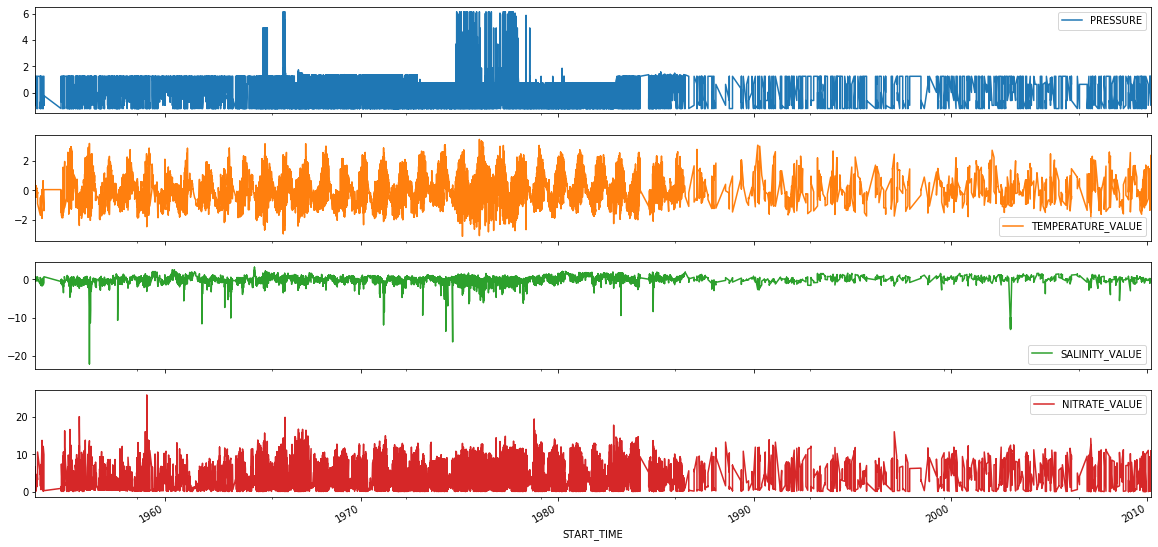

In [15]:
features.plot(subplots=True, figsize=(20,10))

In [16]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)